In [1]:
#--------------------------------------#
# 第3章 二元分類問題 : 精靈寶可夢對戰預測 #
#--------------------------------------#

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

2023-11-14 17:58:32.621696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-14 17:58:32.824213: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-14 17:58:32.912552: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 17:58:33.468775: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
pokemon_df = pd.read_csv('./data/pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [125]:
pokemon_df = pokemon_df.set_index("#")
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [127]:
combats_df = pd.read_csv('./data/combats.csv')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [128]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [129]:
#--- Q. find value_counts() usage

pokemon_df["Type 2"].value_counts(dropna=False)

Type 2
NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64

In [130]:
#--- Q. find fillna() usage

pokemon_df["Type 2"].fillna('empty', inplace=True)
pokemon_df["Type 2"].value_counts()

Type 2
empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64

In [131]:
print(combats_df.dtypes)
print('-' * 30)
print(pokemon_df.dtypes)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object
------------------------------
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [69]:
# --- Q. find astype() usage; what's 'category' ??

pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category')
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category')
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int')
pokemon_df.dtypes

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int64
dtype: object

In [136]:
# FOR TEST -- category usage --
print(pokemon_df['Type 2'].min())

Bug


In [70]:
# 將寶可夢的Type 1 and Type 2轉為One-hot Encoding表示 (pdf.106)
# --- Q. find get_dummies() usage; what's 'category' ??

df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1'])
df_type1_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [71]:
df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2'])
df_type2_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [72]:
# 將兩組One-hot Encoding合併回資料集
combine_df_one_hot = df_type1_one_hot.add(df_type2_one_hot, fill_value=0).astype('int64')

In [73]:
pd.options.display.max_columns = 30

In [74]:
pokemon_df = pokemon_df.join(combine_df_one_hot)
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

In [76]:
pokemon_df['Type 2'].cat.codes.head(10)

#
1     13
2     13
3     13
4     13
5     18
6     18
7      7
8      2
9      7
10    18
dtype: int8

In [77]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [78]:
# 將沒有使用到的資料剔除(name) , pdf.109
pokemon_df.drop('Name', axis='columns', inplace=True)
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [79]:
combats_df['Winner'] = combats_df.apply(lambda x: 0
                                        if x.Winner == x.First_pokemon else 1,
                                        axis='columns')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [80]:
# 將資料集分為三個部份 ， pdf.109
data_num = combats_df.shape[0]
indexes = np.random.permutation(data_num)
train_indexes = indexes[:int(data_num * 0.6)]
val_indexes = indexes[int(data_num * 0.6):int(data_num * 0.8)]
test_indexes = indexes[int(data_num * 0.8):]
train_data = combats_df.loc[train_indexes]
val_data = combats_df.loc[val_indexes]
test_data = combats_df.loc[test_indexes]

In [81]:
# 標準化(Normalization)
pokemon_df['Type 1'] = pokemon_df['Type 1'] / 19
pokemon_df['Type 2'] = pokemon_df['Type 2'] / 19

In [82]:
mean = pokemon_df.loc[:, 'HP':'Generation'].mean()
std = pokemon_df.loc[:, 'HP':'Generation'].std()
pokemon_df.loc[:, 'HP':'Generation'] = (pokemon_df.loc[:, 'HP':'Generation'] - mean) / std
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [83]:
x_train_index = np.array(train_data.drop('Winner', axis='columns'))
x_val_index = np.array(val_data.drop('Winner', axis='columns'))
x_test_index = np.array(test_data.drop('Winner', axis='columns'))
print(x_train_index)

[[645 226]
 [725 246]
 [194 765]
 ...
 [225 799]
 [476 641]
 [547 358]]


In [84]:
# 準備訓練目標 , pdf.111
y_train = np.array(train_data['Winner'])
y_val = np.array(val_data['Winner'])
y_test = np.array(test_data['Winner'])


In [85]:
# 準備兩種不同輸入資料
# 第一種 : 寶可夢的屬性為數值表示

# 取得寶可夢的能力值
pokemon_data_normal = np.array(pokemon_df.loc[:, : 'Legendary'])
print(pokemon_data_normal.shape)
# 透過前面準備的索引產生輸入資料
x_train_normal = pokemon_data_normal[x_train_index - 1].reshape((-1, 20))
x_val_normal = pokemon_data_normal[x_val_index - 1].reshape((-1, 20))
x_test_normal = pokemon_data_normal[x_test_index - 1].reshape((-1, 20))
print(x_train_normal.shape)


(800, 10)
(30000, 20)


In [109]:
# 第二種 : 寶可夢的屬性為 One-hot Encoding 表示
# 取得寶可夢的能力值
pokemon_data_one_hot = np.array(pokemon_df.loc[:, 'HP' :])
print(pokemon_data_one_hot.shape)
# 透過前面準備的索引產生輸入資料
x_train_one_hot = pokemon_data_one_hot[x_train_index - 1].reshape((-1, 54))
x_val_one_hot = pokemon_data_one_hot[x_val_index - 1].reshape((-1, 54))
x_test_one_hot = pokemon_data_one_hot[x_test_index - 1].reshape((-1, 54))
print(x_train_one_hot.shape)


(800, 27)
(30000, 54)


In [89]:
# 建立網路模型 pdf.112
inputs = keras.Input(shape=(20,))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = keras.Model(inputs, outputs, name='model-1')
#顯示網路架構
model_1.summary()


Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1344      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0   

In [90]:
# 設定訓練使用的優化器、損失函數和指標函數
model_1.compile(keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=[keras.metrics.BinaryAccuracy()])

In [92]:
# 建立模型儲存目錄 ; hpvm_ubuntu has been set, donnot exec again!!!
model_dir = 'lab3-logs/models'
os.makedirs(mode_dir)


In [93]:
# 設定回調函數
log_dir = os.path.join('lab3-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5',
                                             mointor='val_binary_accuracy',
                                             save_best_only=True,
                                             mode='max')


2023-11-02 20:36:53.278526: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-11-02 20:36:53.278626: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-11-02 20:36:53.280009: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [94]:
# 訓練網路模型 ; pdf.113
history_1 = model_1.fit(x_train_normal, y_train,
                        batch_size=64,
                        epochs=200,
                        validation_data=(x_val_normal, y_val),
                        callbacks=[model_cbk, model_mckp])


2023-11-02 20:38:23.851125: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-11-02 20:38:23.859529: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1881595000 Hz


Epoch 1/200
 11/469 [..............................] - ETA: 11s - loss: 0.7312 - binary_accuracy: 0.4790

2023-11-02 20:38:26.216368: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-11-02 20:38:26.217983: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-11-02 20:38:26.242790: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-11-02 20:38:26.257953: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-11-02 20:38:26.273888: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: lab3-logs/model-1/train/plugins/profile/2023_11_02_20_38_26
2023-11-02 20:38:26.292079: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to lab3-logs/model-1/train/plugins/profile/2023_11_02_20_38_26/VMUBUNTU64.trace.json.gz
2023-11-02 20:38:26.327195: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: lab3-logs/model-1/train/plugins/profile/2023_11_02_20_

469/469 [==============================] - 7s 10ms/step - loss: 0.5442 - binary_accuracy: 0.7112 - val_loss: 0.3056 - val_binary_accuracy: 0.9087
Epoch 2/200
469/469 [==============================] - 4s 8ms/step - loss: 0.3562 - binary_accuracy: 0.8816 - val_loss: 0.2312 - val_binary_accuracy: 0.9276
Epoch 3/200
469/469 [==============================] - 3s 7ms/step - loss: 0.2897 - binary_accuracy: 0.9059 - val_loss: 0.2005 - val_binary_accuracy: 0.9309
Epoch 4/200
469/469 [==============================] - 4s 8ms/step - loss: 0.2433 - binary_accuracy: 0.9214 - val_loss: 0.1870 - val_binary_accuracy: 0.9338
Epoch 5/200
469/469 [==============================] - 3s 7ms/step - loss: 0.2416 - binary_accuracy: 0.9227 - val_loss: 0.1858 - val_binary_accuracy: 0.9346
Epoch 6/200
469/469 [==============================] - 3s 7ms/step - loss: 0.2172 - binary_accuracy: 0.9317 - val_loss: 0.1771 - val_binary_accuracy: 0.9406
Epoch 7/200
469/469 [==============================] - 3s 7ms/step - 

In [110]:
# 使用 One-hot Encoding 訓練網路 ; pdf.114
inputs = keras.Input(shape=(54,))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = keras.Model(inputs, outputs, name='model-2')
#顯示網路架構
model_2.summary()


Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                3520      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0   

In [111]:
# 設定訓練使用的優化器、損失函數和指標函數
model_2.compile(keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=[keras.metrics.BinaryAccuracy()])


In [112]:
# 設定回調函數
log_dir = os.path.join('lab3-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5',
                                             mointor='val_binary_accuracy',
                                             save_best_only=True,
                                             mode='max')


2023-11-02 21:14:58.163275: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-11-02 21:14:58.163366: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-11-02 21:14:58.163429: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [113]:
# 訓練網路模型 ; pdf.115
history_2 = model_2.fit(x_train_one_hot, y_train,
                        batch_size=64,
                        epochs=200,
                        validation_data=(x_val_one_hot, y_val),
                        callbacks=[model_cbk, model_mckp])


Epoch 1/200
  2/469 [..............................] - ETA: 42s - loss: 0.7156 - binary_accuracy: 0.5156  

2023-11-02 21:15:01.911208: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-11-02 21:15:01.928462: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


 23/469 [>.............................] - ETA: 10s - loss: 0.7009 - binary_accuracy: 0.5244

2023-11-02 21:15:02.165460: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-11-02 21:15:02.169843: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-11-02 21:15:02.173577: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: lab3-logs/model-2/train/plugins/profile/2023_11_02_21_15_02
2023-11-02 21:15:02.175977: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to lab3-logs/model-2/train/plugins/profile/2023_11_02_21_15_02/VMUBUNTU64.trace.json.gz
2023-11-02 21:15:02.185391: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: lab3-logs/model-2/train/plugins/profile/2023_11_02_21_15_02
2023-11-02 21:15:02.187204: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to lab3-logs/model-2/train/plugins/profile/2023_11_02_21_15_02/VMUBUNTU64.memory

469/469 [==============================] - 55s 114ms/step - loss: 0.5281 - binary_accuracy: 0.7339 - val_loss: 0.3192 - val_binary_accuracy: 0.8942
Epoch 2/200
469/469 [==============================] - -44s -94991us/step - loss: 0.3495 - binary_accuracy: 0.8853 - val_loss: 0.2489 - val_binary_accuracy: 0.9160
Epoch 3/200
469/469 [==============================] - 4s 9ms/step - loss: 0.2957 - binary_accuracy: 0.9005 - val_loss: 0.2047 - val_binary_accuracy: 0.9207
Epoch 4/200
469/469 [==============================] - 4s 8ms/step - loss: 0.2626 - binary_accuracy: 0.9107 - val_loss: 0.1882 - val_binary_accuracy: 0.9248
Epoch 5/200
469/469 [==============================] - 4s 9ms/step - loss: 0.2395 - binary_accuracy: 0.9171 - val_loss: 0.1770 - val_binary_accuracy: 0.9297
Epoch 6/200
469/469 [==============================] - 4s 8ms/step - loss: 0.2217 - binary_accuracy: 0.9208 - val_loss: 0.1725 - val_binary_accuracy: 0.9308
Epoch 7/200
469/469 [==============================] - 4s 8m

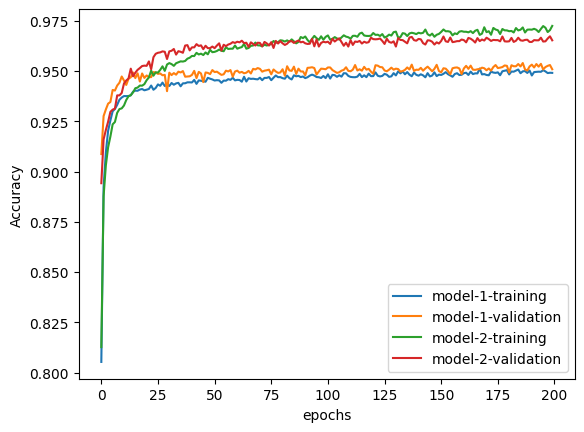

In [115]:
# 比較兩種網路的訓練結果
plt.plot(history_1.history['binary_accuracy'], label='model-1-training')
plt.plot(history_1.history['val_binary_accuracy'], label='model-1-validation')
plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()


In [117]:
# 驗證在測試資料上
# 載入 Model 1準確率最高的模型權重
model_1.load_weights(model_dir + '/Best-model-1.h5')

# 載入 Model 2準確率最高的模型權重
model_2.load_weights(model_dir + '/Best-model-2.h5')

loss_1, accuracy_1 = model_1.evaluate(x_test_normal, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test_one_hot, y_test)

print("Model-1: {}%\nModel-2: {}%".format(accuracy_1, accuracy_2))


313/313 [==============================] - 1s 3ms/step - loss: 0.3147 - binary_accuracy: 0.8981
Model-1: 0.9086999893188477%
Model-2: 0.8981000185012817%


In [118]:
# 讀取個別資料
venusaur = np.expand_dims(pokemon_data_one_hot[3], axis=0)   # 妙蛙花
charizard = np.expand_dims(pokemon_data_one_hot[7], axis=0)  # 嗔火龍
blastoise = np.expand_dims(pokemon_data_one_hot[12], axis=0) # 水箭龜

In [122]:
# 三隻寶可夢的PK預測
# 妙蛙花 vs. 嗔火龍
pred = model_2.predict(np.concatenate([venusaur, charizard], axis=-1))
winner = '妙蛙花' if pred < 0.5 else '嗔火龍'
print("pred={}, {} 獲勝".format(pred, winner))

# 嗔火龍 vs. 水箭龜
pred = model_2.predict(np.concatenate([charizard, blastoise], axis=-1))
winner = '嗔火龍' if pred < 0.5 else '水箭龜'
print("pred={}, {} 獲勝".format(pred, winner))
      
# 水箭龜 vs. 妙蛙花
pred = model_2.predict(np.concatenate([venusaur, charizard], axis=-1))
winner = '水箭龜' if pred < 0.5 else '妙蛙花'
print("pred={}, {} 獲勝".format(pred, winner))


pred=[[0.84790504]], 嗔火龍 獲勝
pred=[[0.10314551]], 嗔火龍 獲勝
pred=[[0.84790504]], 妙蛙花 獲勝
